House price predictions:

1. Data cleaning and preprocessing

Modeling:
2. Baseline regressions
3. Random Forest
3. Improvements- hyperparameter tuning
4. Bagging
5. Boosting
6. Neural network
7. SVM


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Get datasets

In [108]:
df_sub = pd.read_csv('/sample_submission.csv')
df_train = pd.read_csv('/train.csv') 
df_test = pd.read_csv('/test.csv')

STEP1: Data cleaning and visualizations

a) Continuous features VS target label - Sales Price

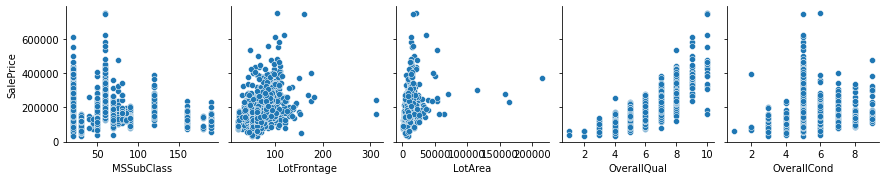

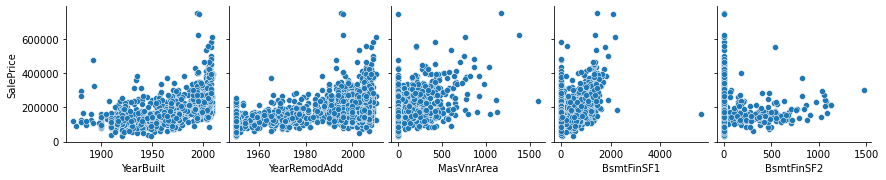

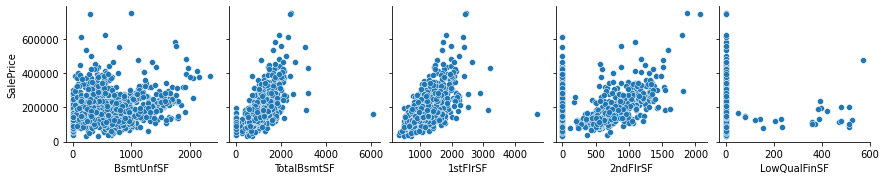

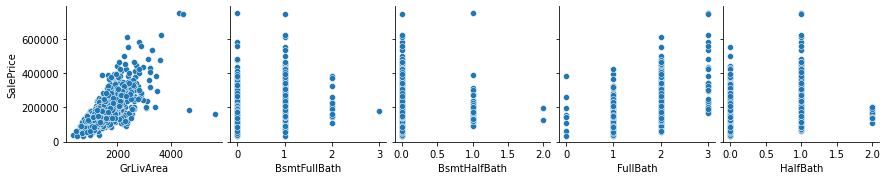

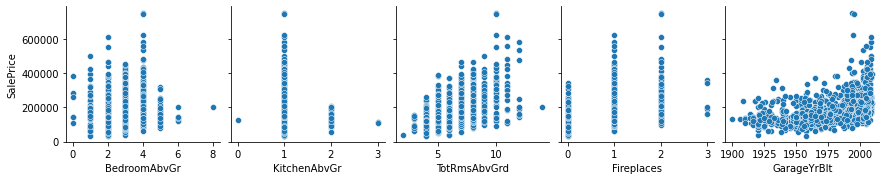

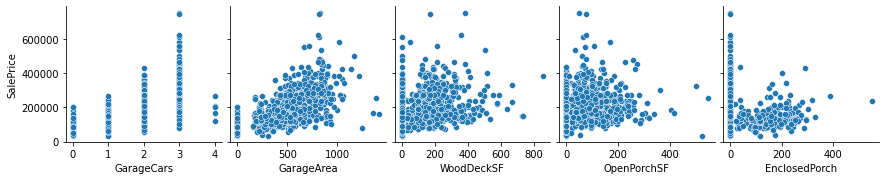

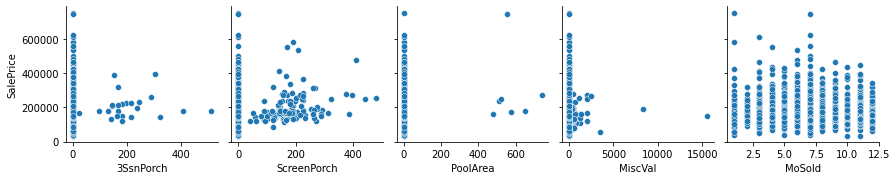

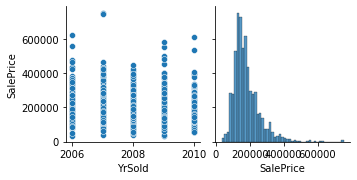

In [109]:
num_columns = [col for col in df_train.columns if (df_train[col].dtype == 'int64' or df_train[col].dtype == 'float64') and (col !='Id') ]
df_col = df_train[num_columns]
for i in range(0, len(num_columns), 5):
        sns.pairplot(data=df_col,
                    x_vars=df_col.columns[i:i+5],
                    y_vars=['SalePrice'])

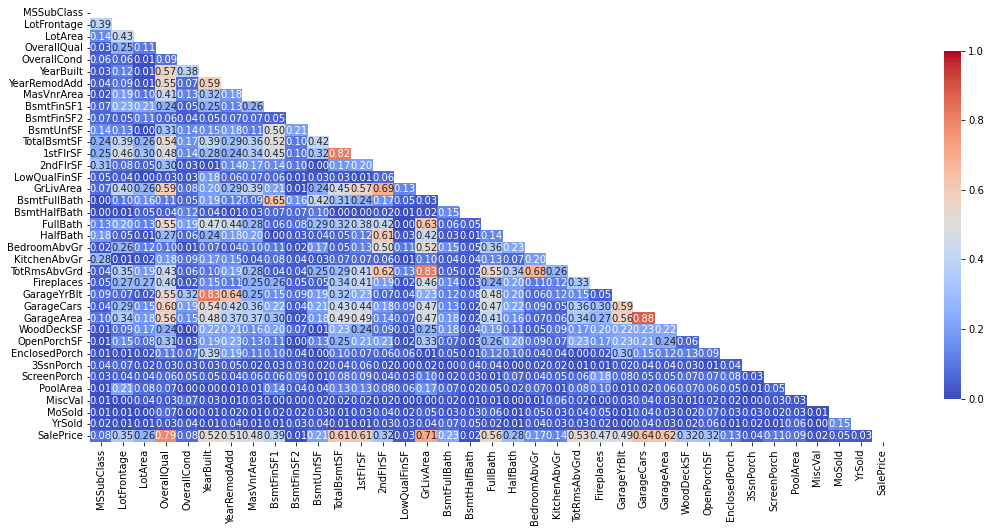

In [110]:
#Heatmap to compare each feature to every other feature
num_columns = [col for col in df_train.columns if (df_train[col].dtype == 'int64' or df_train[col].dtype == 'float64') and (col !='Id') ]
corr = df_train[num_columns].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(18,8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
plt.show()


b) Visualizing missing data

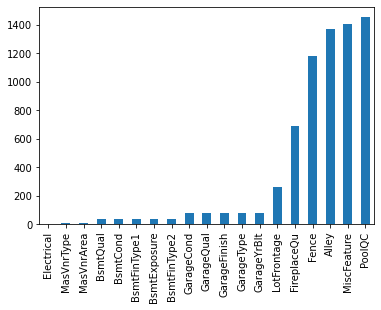

In [111]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [112]:
df_train_nu = (df_train.isnull().sum() / len(df_train)) * 100
df_train_nu = df_train_nu.drop(df_train_nu[df_train_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_nu})
missing_data.head(100)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


c) Handling missing data

i) Removing data columns that is majorly missing

In [113]:
print("Total records:",df_train.shape[0])
print("Large portion of data is missing for following features:")
print("PoolQC", df_train.PoolQC.isnull().sum())
print("MiscFeature",df_train['MiscFeature'].isnull().sum())
print("Alley",df_train['Alley'].isnull().sum())
print("Fence",df_train['Fence'].isnull().sum())
print("FireplaceQu",df_train['FireplaceQu'].isnull().sum())


Total records: 1460
Large portion of data is missing for following features:
PoolQC 1453
MiscFeature 1406
Alley 1369
Fence 1179
FireplaceQu 690


In [114]:
#Removing the above columns/features from both train and test
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1, inplace = True )

df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1, inplace = True )


ii) Data imputation

With imputation need to ensure the data distribution is not hampered by filling in for those missing data.
Below an example is shown for one feature where the distribution before and after imputation remain undisturbed.

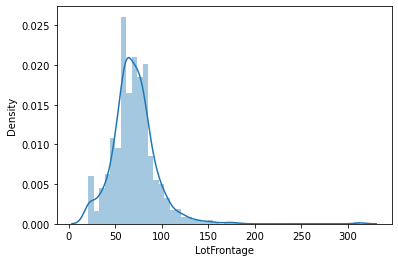

In [115]:
#Before impute
ax = sns.distplot(df_train['LotFrontage'])

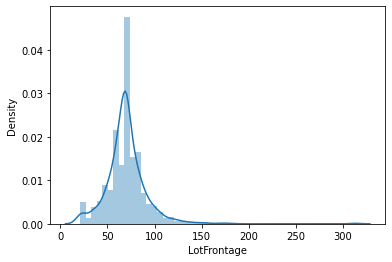

In [116]:
df_train['LotFrontage'].fillna(df_train.LotFrontage.median(), inplace = True) #Impute
ax = sns.distplot(df_train['LotFrontage'])

Impute for other missing values

In [117]:
#Training set imputation
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0], inplace = True)
df_train['GarageYrBlt'].fillna(df_train.GarageYrBlt.median(), inplace = True)
df_train['GarageFinish'].fillna(df_train.GarageFinish.mode()[0], inplace = True)
df_train['GarageQual'].fillna(df_train.GarageQual.mode()[0], inplace = True)
df_train['GarageCond'].fillna(df_train.GarageCond.mode()[0], inplace = True)
df_train['BsmtExposure'].fillna(df_train.BsmtExposure.mode()[0], inplace = True)
df_train['BsmtFinType2'].fillna(df_train.BsmtFinType2.mode()[0], inplace = True)
df_train['BsmtQual'].fillna(df_train.BsmtQual.mode()[0], inplace = True)
df_train['BsmtCond'].fillna(df_train.BsmtCond.mode()[0], inplace = True)
df_train['BsmtFinType1'].fillna(df_train.BsmtFinType1.mode()[0], inplace = True)
df_train['MasVnrType'].fillna(df_train.BsmtFinType1.mode()[0], inplace = True)
df_train['MasVnrArea'].fillna(df_train.MasVnrArea.median(), inplace = True)
df_train['Electrical'].fillna(df_train.MasVnrArea.median(), inplace = True)

In [ ]:
#Checking- no more missing data in training set

In [118]:
df_train_nu = (df_train.isnull().sum() / len(df_train)) * 100
df_train_nu = df_train_nu.drop(df_train_nu[df_train_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_nu})
missing_data.head(100)

,Missing Ratio


In [119]:
#Test set imputation

df_test['LotFrontage'].fillna(df_test.LotFrontage.median(), inplace = True)
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0], inplace = True)
df_test['GarageYrBlt'].fillna(df_test.GarageYrBlt.median(), inplace = True)
df_test['GarageFinish'].fillna(df_test.GarageFinish.mode()[0], inplace = True)
df_test['GarageQual'].fillna(df_test.GarageQual.mode()[0], inplace = True)
df_test['GarageCond'].fillna(df_test.GarageCond.mode()[0], inplace = True)
df_test['BsmtExposure'].fillna(df_test.BsmtExposure.mode()[0], inplace = True)
df_test['BsmtFinType2'].fillna(df_test.BsmtFinType2.mode()[0], inplace = True)
df_test['BsmtQual'].fillna(df_test.BsmtQual.mode()[0], inplace = True)
df_test['BsmtCond'].fillna(df_test.BsmtCond.mode()[0], inplace = True)
df_test['BsmtFinType1'].fillna(df_test.BsmtFinType1.mode()[0], inplace = True)
df_test['MasVnrArea'].fillna(df_test.MasVnrArea.median(), inplace = True)
df_test['Electrical'].fillna(df_test.Electrical.mode()[0], inplace = True)
df_test['MasVnrType'].fillna(df_test.MasVnrType.mode()[0], inplace = True)
df_test['BsmtFullBath'].fillna(df_test.BsmtFullBath.mode()[0], inplace = True)
df_test['BsmtHalfBath'].fillna(df_test.BsmtHalfBath.mode()[0], inplace = True)
df_test['BsmtFinSF1'].fillna(df_test.BsmtFinSF1.median(), inplace = True)
df_test['GarageCars'].fillna(df_test.GarageCars.mode()[0], inplace = True)
df_test['GarageArea'].fillna(df_test.GarageArea.mean(), inplace = True)
df_test['TotalBsmtSF'].fillna(df_test.TotalBsmtSF.mode()[0], inplace = True)
df_test['BsmtFinSF2'].fillna(df_test.BsmtFinSF2.mode()[0], inplace = True)
df_test['BsmtUnfSF'].fillna(df_test.BsmtUnfSF.median(), inplace = True)
df_test['MSZoning'].fillna(df_test.MSZoning.mode()[0], inplace = True)
df_test['Functional'].fillna(df_test.Functional.mode()[0], inplace = True)
df_test['Utilities'].fillna(df_test.Utilities.mode()[0], inplace = True)
df_test['Exterior2nd'].fillna(df_test.Exterior2nd.mode()[0], inplace = True)
df_test['Exterior1st'].fillna(df_test.Exterior1st.mode()[0], inplace = True)
df_test['SaleType'].fillna(df_test.SaleType.mode()[0], inplace = True)
df_test['KitchenQual'].fillna(df_test.KitchenQual.mode()[0], inplace = True)


In [120]:
df_test_nu = (df_test.isnull().sum() / len(df_test)) * 100
df_test_nu = df_test_nu.drop(df_test_nu[df_test_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_test_nu})
missing_data.head(100)

,Missing Ratio


d) Handling categorical variables- Using Label encoder

In [ ]:
#Train set

In [121]:

df_train.select_dtypes(include=['object'])
df_train_object=df_train.select_dtypes(include=['object'])
df_train_object.columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [122]:
object_cols=('MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition')

In [123]:
for i in object_cols:
    lb_encoder = LabelEncoder() 
    lb_encoder.fit(list(df_train[i].values)) 
    df_train[i] = lb_encoder.transform(list(df_train[i].values))

In [124]:
#Checking for object type data - index is empty
df_train_object=df_train.select_dtypes(include=['object'])
df_train_object.columns

Index([], dtype='object')

In [ ]:
#Test Set

In [125]:
df_test.select_dtypes(include=['object'])
df_test_object=df_test.select_dtypes(include=['object'])
df_test_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [126]:
object_cols=('MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition')

In [127]:
for i in object_cols:
    lb_encoder = LabelEncoder() 
    lb_encoder.fit(list(df_test[i].values)) 
    df_test[i] = lb_encoder.transform(list(df_test[i].values))

In [128]:
df_test_object=df_test.select_dtypes(include=['object'])

df_test_object.columns

Index([], dtype='object')

**STEP 2:  Modeling **

**REGRESSION MODELS**

In [129]:
#Data Splitting

x_data=df_train.drop('SalePrice',axis=1)
y_data=df_train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)



In [130]:
#Linear regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LinearRegression()
model.fit(x_train , y_train)
predictions = model.predict(x_test)

print('Mean Absolute Error(MAE) test:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Absolute Error(MAE) train:', metrics.mean_absolute_error(y_train, model.predict(x_train)))

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
print('R2:',metrics.r2_score(y_test, predictions))


Mean Absolute Error(MAE) test: 18574.064606051503
Mean Absolute Error(MAE) train: 19610.773907487866
Mean Squared Error(MSE): 570551759.0084902
Root Mean Squared Error (RMSE): 23886.225298453715
Explained Variance Score (EVS): 0.8928120158220558
R2: 0.8918326726537932


In [131]:
#Decision Tree
model_DecisionTree = DecisionTreeRegressor()
model_DecisionTree.fit(x_train , y_train)
train_pred=model_DecisionTree.predict(x_train)

DecisionTree_predictions = model_DecisionTree.predict(x_test)

print('Mean Absolute Error(MAE) test:', metrics.mean_absolute_error(y_test, DecisionTree_predictions))
print('Mean Absolute Error(MAE) train:', metrics.mean_absolute_error(y_train, model_DecisionTree.predict(x_train)))

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, DecisionTree_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, DecisionTree_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,DecisionTree_predictions))
print('R2:',metrics.r2_score(y_test, DecisionTree_predictions))


Mean Absolute Error(MAE) test: 24045.821917808218
Mean Absolute Error(MAE) train: 0.0
Mean Squared Error(MSE): 1197292323.7465754
Root Mean Squared Error (RMSE): 34601.91214003318
Explained Variance Score (EVS): 0.7732166458530318
R2: 0.773012862256605


Advanced Techniques are explored

- Bagging
- Random Forest
- Boosting


In [133]:
#Bagging
# define dataset
#x_train , y_train = make_regression( n_features=, n_informative=15, noise=0.1, random_state=5)


model_BR = BaggingRegressor()
model_BR.fit(x_train , y_train)
train_pred=model_BR.predict(x_train)
yhat = model_BR.predict(x_test)

print('Mean Absolute Error(MAE) Test:', metrics.mean_absolute_error(y_test, yhat))
print('Mean Absolute Error(MAE) train:', metrics.mean_absolute_error(y_train, model_BR.predict(x_train)))

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yhat))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yhat))
print('R2:',metrics.r2_score(y_test, yhat))
print('R2 rounded:',(metrics.r2_score(y_test, yhat)).round(2))



Mean Absolute Error(MAE): 17008.766438356164
Mean Absolute Error(MAE) train: 8224.181335616438
Mean Squared Error(MSE): 553464109.387945
Root Mean Squared Error (RMSE): 23525.817932389622
Explained Variance Score (EVS): 0.8950885950326659
R2: 0.895072212907415
R2 rounded: 0.9


In [135]:
#Random Forest
model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(x_train , y_train)
RandomForest_predictions = model_RandomForest.predict(x_test)

print('Mean Absolute Error(MAE) Test:', metrics.mean_absolute_error(y_test, RandomForest_predictions))
print('Mean Absolute Error(MAE) Train:', metrics.mean_absolute_error(y_train, model_RandomForest.predict(x_train)))


print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))


Mean Absolute Error(MAE) Test: 15831.931061643832
Mean Absolute Error(MAE) Train: 6889.73327910959
Mean Squared Error(MSE): 460289423.56103724
Root Mean Squared Error (RMSE): 21454.35675011109
Explained Variance Score (EVS): 0.9127793421588561
R2: 0.9127366168516489
R2 rounded: 0.91


Hyper parameter tuning for Random Forest Regressor

In [137]:
#N_estimaotrs

n_estimator=[10,20,50,100,500]
# for loop to iterate for each leaf size
for n_est in n_estimator :
    print("N_est is:",n_est)
    model = RandomForestRegressor(n_estimators = n_est)
    model_RandomForest.fit(x_train , y_train)
    RandomForest_predictions = model_RandomForest.predict(x_test)
    print('Mean Absolute Error(MAE) Test:', metrics.mean_absolute_error(y_test, RandomForest_predictions))
    print('Mean Absolute Error(MAE) Train:', metrics.mean_absolute_error(y_train, model_RandomForest.predict(x_train)))

    print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
    print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
    print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
    print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))




N_est is: 10
Mean Absolute Error(MAE) Test: 15584.484006849316
Mean Absolute Error(MAE) Train: 6801.295873287671
Mean Squared Error(MSE): 459706727.8809003
Root Mean Squared Error (RMSE): 21440.772557930377
Explained Variance Score (EVS): 0.9129703286869136
R2: 0.9128470864687895
R2 rounded: 0.91
N_est is: 20
Mean Absolute Error(MAE) Test: 15646.286643835618
Mean Absolute Error(MAE) Train: 6859.051686643836
Mean Squared Error(MSE): 453442910.2799123
Root Mean Squared Error (RMSE): 21294.19898188031
Explained Variance Score (EVS): 0.9140646750378059
R2: 0.9140346043375636
R2 rounded: 0.91
N_est is: 50
Mean Absolute Error(MAE) Test: 15455.483664383562
Mean Absolute Error(MAE) Train: 6706.85620719178
Mean Squared Error(MSE): 451318689.26725996
Root Mean Squared Error (RMSE): 21244.26250231483
Explained Variance Score (EVS): 0.9144520179846847
R2: 0.9144373220682573
R2 rounded: 0.91
N_est is: 100
Mean Absolute Error(MAE) Test: 15607.775102739726
Mean Absolute Error(MAE) Train: 6890.4057191

In [138]:
#Max_Depth

max_depth=[2,5,10,12,15,20,25]
# for loop to iterate for each leaf size
for md in max_depth :
    print("md is:",md)
    model = RandomForestRegressor(n_estimators = 500, max_depth=md)
    model_RandomForest.fit(x_train , y_train)
    RandomForest_predictions = model_RandomForest.predict(x_test)
    print('Mean Absolute Error(MAE) Test:', metrics.mean_absolute_error(y_test, RandomForest_predictions))
    print('Mean Absolute Error(MAE) Train:', metrics.mean_absolute_error(y_train, model_RandomForest.predict(x_train)))

    print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
    print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
    print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
    print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))



md is: 2
Mean Absolute Error(MAE) Test: 15435.343664383561
Mean Absolute Error(MAE) Train: 6661.764888698631
Mean Squared Error(MSE): 440486762.1012285
Root Mean Squared Error (RMSE): 20987.77649254986
Explained Variance Score (EVS): 0.9165036852487946
R2: 0.9164908791611222
R2 rounded: 0.92
md is: 5
Mean Absolute Error(MAE) Test: 15386.463321917812
Mean Absolute Error(MAE) Train: 6816.998501712329
Mean Squared Error(MSE): 441347307.52815247
Root Mean Squared Error (RMSE): 21008.267599403633
Explained Variance Score (EVS): 0.916362477071772
R2: 0.9163277337542056
R2 rounded: 0.92
md is: 10
Mean Absolute Error(MAE) Test: 15474.854452054795
Mean Absolute Error(MAE) Train: 6848.627397260274
Mean Squared Error(MSE): 456848657.9320425
Root Mean Squared Error (RMSE): 21374.018291655935
Explained Variance Score (EVS): 0.9134349072873377
R2: 0.9133889300138409
R2 rounded: 0.91
md is: 12
Mean Absolute Error(MAE) Test: 15767.594178082192
Mean Absolute Error(MAE) Train: 6816.515205479452
Mean Squ

For best value from above estimates- n_est=500 and md=15

In [139]:
#Min_Sample_Leaf
min_samples_leaf=[1,2,5,10,12,15,20,25]
# for loop to iterate for each leaf size
for mn in min_samples_leaf :
    print("min_samples_leaf is:",mn)
    model = RandomForestRegressor(n_estimators = 500, max_depth=15, min_samples_leaf=mn)
    model_RandomForest.fit(x_train , y_train)
    RandomForest_predictions = model_RandomForest.predict(x_test)
    print('Mean Absolute Error(MAE) Test:', metrics.mean_absolute_error(y_test, RandomForest_predictions))
    print('Mean Absolute Error(MAE) Train:', metrics.mean_absolute_error(y_train, model_RandomForest.predict(x_train)))

    print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
    print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
    print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
    print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))


    

min_samples_leaf is: 1
Mean Absolute Error(MAE) Test: 15478.077568493152
Mean Absolute Error(MAE) Train: 6776.352294520549
Mean Squared Error(MSE): 455839884.1841696
Root Mean Squared Error (RMSE): 21350.407119869393
Explained Variance Score (EVS): 0.9136073507425078
R2: 0.9135801770978812
R2 rounded: 0.91
min_samples_leaf is: 2
Mean Absolute Error(MAE) Test: 15333.545376712329
Mean Absolute Error(MAE) Train: 6754.210676369863
Mean Squared Error(MSE): 465048168.6026887
Root Mean Squared Error (RMSE): 21564.97550665636
Explained Variance Score (EVS): 0.9120038060714664
R2: 0.9118344362439298
R2 rounded: 0.91
min_samples_leaf is: 5
Mean Absolute Error(MAE) Test: 15389.245445205479
Mean Absolute Error(MAE) Train: 6823.529109589041
Mean Squared Error(MSE): 454405812.6833105
Root Mean Squared Error (RMSE): 21316.796492046138
Explained Variance Score (EVS): 0.913909913988531
R2: 0.9138520537138448
R2 rounded: 0.91
min_samples_leaf is: 10
Mean Absolute Error(MAE) Test: 15222.589965753426
Mean

Best MAE=15222 is found at n_est=500, max_depth=15, min_leaf=10


In [ ]:

#XGboost regressor
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train , y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



MAE: -24257.427 (2073.378)


In [176]:
#GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train, y_train)
ygbr=gbr.predict(x_test)

print("Model Accuracy Test: %.3f" % gbr.score(x_test, y_test))
print("Model Accuracy Train: %.3f" % gbr.score(x_train, y_train))

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, ygbr))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, ygbr))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ygbr)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,ygbr))
print('R2:',metrics.r2_score(y_test, ygbr))
print('R2 rounded:',(metrics.r2_score(y_test, ygbr)).round(2))


Model Accuracy Test: 0.906
Model Accuracy Train: 0.969
Mean Absolute Error(MAE): 14454.756451089863
Mean Squared Error(MSE): 431240902.9263647
Root Mean Squared Error (RMSE): 20766.34062434604
Explained Variance Score (EVS): 0.9060329141803127
R2: 0.9058885209627369
R2 rounded: 0.91


The MAE is greatly reduced to 14454 from previous regression models.
Also the accuracy scores for train Vs test is less determining there is no overfit issues.


**NEURAL NETWORK**

In [142]:
col_list1 = ['SalePrice','MSSubClass','MSZoning','LotFrontage','LotArea','Street','YearBuilt','LotShape','1stFlrSF','2ndFlrSF']
col_list2 = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','YearBuilt','LotShape','1stFlrSF','2ndFlrSF']
pricing_data = pd.read_csv('/train.csv',usecols=col_list1).dropna()
pricing_test_data = pd.read_csv('/test.csv',usecols=col_list2).dropna()

In [143]:
import datetime
pricing_data['Total Years'] = datetime.datetime.now().year - pricing_data['YearBuilt']
pricing_data.drop('YearBuilt',axis=1,inplace=True)

In [144]:
cat_features = ['MSSubClass','MSZoning','Street','LotShape']
label_encoder ={}

for feature in cat_features:
    label_encoder[feature]=LabelEncoder()
    pricing_data[feature]= label_encoder[feature].fit_transform(pricing_data[feature])

pricing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,19
1,0,3,80.0,9600,1,3,1262,0,181500,46
2,5,3,68.0,11250,1,0,920,866,223500,21
3,6,3,60.0,9550,1,0,961,756,140000,107
4,5,3,84.0,14260,1,0,1145,1053,250000,22


In [145]:
cat_features = np.stack([pricing_data['MSSubClass'],pricing_data['MSZoning'],pricing_data['Street'],pricing_data['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as f

In [147]:
## Converting numpy to tensors

cat_features = torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [148]:
## Creating Continous Variables
cont_features =[]
for i in pricing_data.columns:
    if i in ['MSSubClass','MSZoning','Street','LotShape','SalePrice']:
        pass
    else:
        cont_features.append(i)

cont_values = np.stack([pricing_data[i].values for i in cont_features],axis = 1)
cont_values = torch.tensor(cont_values,dtype=torch.float)
len(cont_features)

5

In [149]:
## Dependent Feature
y = torch.tensor(pricing_data['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [150]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

Embedding Categorical Features into the Neural Network
While embedding the categorical features, we need to know the exact
input and output dimensions of the features
Here 'MSSubClass','MSZoning','Street','LotShape' has output dimensions as [15,5,2,4]
respectively

In [151]:
cat_dims = [len(pricing_data[col].unique()) for col in ['MSSubClass','MSZoning','Street','LotShape']]
## output dimensions should be set based on the input dimensions (min)
embedding_dims = [(x, min(50,(x+1)//2)) for x in cat_dims]
embedding_dims

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [152]:
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dims])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [153]:
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[-0.5943,  1.3361, -0.2407,  ...,  0.3392,  0.2584,  0.8634],
         [ 0.6085,  0.4155, -0.2119,  ...,  0.8640,  2.2847, -1.9048],
         [-0.5943,  1.3361, -0.2407,  ...,  0.3392,  0.2584,  0.8634],
         ...,
         [ 2.9678, -0.7569, -1.5468,  ...,  0.7889,  0.3029,  0.2303],
         [ 0.6085,  0.4155, -0.2119,  ...,  0.8640,  2.2847, -1.9048],
         [ 0.6085,  0.4155, -0.2119,  ...,  0.8640,  2.2847, -1.9048]],
        grad_fn=<EmbeddingBackward0>), tensor([[-0.5473, -1.0473,  0.2751],
         [-0.5473, -1.0473,  0.2751],
         [-0.5473, -1.0473,  0.2751],
         ...,
         [-0.5473, -1.0473,  0.2751],
         [-0.5473, -1.0473,  0.2751],
         [-0.5473, -1.0473,  0.2751]], grad_fn=<EmbeddingBackward0>), tensor([[-0.3642],
         [-0.3642],
         [-0.3642],
         ...,
         [-0.3642],
         [-0.3642],
         [-0.3642]], grad_fn=<EmbeddingBackward0>), tensor([[-0.5624,  1.5390],
         [-0.5624,  1.5390],
         [ 0.1403,  0.906

In [154]:
z = torch.cat(embedding_val,1)
z

tensor([[-0.5943,  1.3361, -0.2407,  ..., -0.3642, -0.5624,  1.5390],
        [ 0.6085,  0.4155, -0.2119,  ..., -0.3642, -0.5624,  1.5390],
        [-0.5943,  1.3361, -0.2407,  ..., -0.3642,  0.1403,  0.9060],
        ...,
        [ 2.9678, -0.7569, -1.5468,  ..., -0.3642, -0.5624,  1.5390],
        [ 0.6085,  0.4155, -0.2119,  ..., -0.3642, -0.5624,  1.5390],
        [ 0.6085,  0.4155, -0.2119,  ..., -0.3642, -0.5624,  1.5390]],
       grad_fn=<CatBackward0>)

In [155]:
# Dropout layer -> Regularization method
dropout=nn.Dropout(0.4)
final_embed = dropout(z)
final_embed

tensor([[-0.9905,  2.2269, -0.0000,  ..., -0.6070, -0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.3532,  ..., -0.6070, -0.9373,  2.5650],
        [-0.9905,  2.2269, -0.0000,  ..., -0.6070,  0.0000,  0.0000],
        ...,
        [ 0.0000, -1.2615, -2.5780,  ..., -0.6070, -0.9373,  2.5650],
        [ 0.0000,  0.0000, -0.3532,  ..., -0.0000, -0.0000,  2.5650],
        [ 1.0142,  0.6924, -0.3532,  ..., -0.0000, -0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

In [156]:
## Creating the neural network
class FeedForwardNN(nn.Module):
    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in =i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [157]:
len(cont_features)

5

In [158]:
torch.manual_seed(100)
price_model = FeedForwardNN(embedding_dims,len(cont_features),1,[100,50],p=0.4)
price_model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [159]:
loss_ftn = nn.MSELoss()
optimizer = torch.optim.Adam(price_model.parameters(),lr = 0.01)

In [160]:
pricing_data.shape

(1201, 10)

In [161]:
batch_size = 1200
test_size = int(batch_size*0.15)
train_categorical = cat_features[:batch_size - test_size]
test_categorical = cat_features[batch_size - test_size: batch_size]
train_cont = cont_values[:batch_size - test_size]
test_cont = cont_values[batch_size - test_size: batch_size]

y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [162]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [163]:
epochs = 5000
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = price_model(train_categorical,train_cont)
    loss = torch.sqrt(loss_ftn(y_pred,y_train)) ## RMSE
    final_losses.append(loss)
    if i%10 == 1:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epoch number: 1 and the loss: 200496.75
Epoch number: 11 and the loss: 200496.359375
Epoch number: 21 and the loss: 200496.03125
Epoch number: 31 and the loss: 200495.75
Epoch number: 41 and the loss: 200495.5
Epoch number: 51 and the loss: 200495.140625
Epoch number: 61 and the loss: 200494.828125
Epoch number: 71 and the loss: 200494.546875
Epoch number: 81 and the loss: 200494.25
Epoch number: 91 and the loss: 200493.890625
Epoch number: 101 and the loss: 200493.5
Epoch number: 111 and the loss: 200493.046875
Epoch number: 121 and the loss: 200492.796875
Epoch number: 131 and the loss: 200492.421875
Epoch number: 141 and the loss: 200491.9375
Epoch number: 151 and the loss: 200491.578125
Epoch number: 161 and the loss: 200491.0625
Epoch number: 171 and the loss: 200490.546875
Epoch number: 181 and the loss: 200490.125
Epoch number: 191 and the loss: 200489.6875
Epoch number: 201 and the loss: 200489.046875
Epoch number: 211 and the loss: 200488.65625
Epoch number: 221 and the loss: 

Text(0.5, 0, 'epoch')

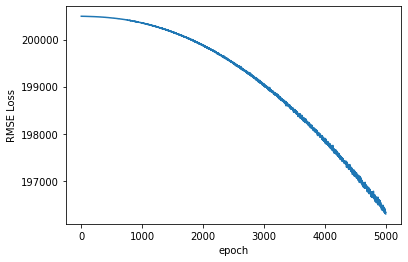

In [164]:
mylosses=torch.Tensor(final_losses)
loss1 = mylosses.detach().numpy()
plt.plot(range(epochs),list(loss1))
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [165]:
# Validation of the test data
y_pred = ""
with torch.no_grad():
    y_pred = price_model(test_categorical,test_cont)
    loss = torch.sqrt(loss_ftn(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 187074.078125


In [166]:
data_verify = pd.DataFrame(y_test.tolist(),columns=['Test'])
data_predicted = pd.DataFrame(y_pred.tolist(),columns=['Prediction'])
data_predicted

,Prediction
0,1564.810791
1,3874.911377
2,1529.425293
3,6821.970703
4,4224.921875
...,...
175,2467.743652
176,3439.034668
177,6407.023438
178,4027.207275


In [ ]:
torch.save(price_model,'houseprice.pt')

**SVM**

In [167]:
from sklearn import svm

In [172]:
#Data Splitting

x_data=df_train.drop('SalePrice',axis=1)
y_data=df_train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)



In [173]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train , y_train)
predictions = model_svm.predict(x_test)

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Absolute Error(MAE): on training', metrics.mean_absolute_error(y_train, model_svm.predict(x_train)))

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
print('R2:',metrics.r2_score(y_test, predictions))

Mean Absolute Error(MAE): 34428.643835616436
Mean Absolute Error(MAE): on training 0.0
Mean Squared Error(MSE): 2883250042.0753427
Root Mean Squared Error (RMSE): 53695.90340124042
Explained Variance Score (EVS): 0.37210334363046427
R2: 0.3707764637987164


In [174]:
model = svm.SVR()
model.fit(x_train , y_train)
predictions = model.predict(x_test)

#confusion_matrix(y_test, predictions)

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
print('R2:',metrics.r2_score(y_test, predictions))

Mean Absolute Error(MAE): 49045.21175193778
Mean Squared Error(MSE): 4994950301.95566
Root Mean Squared Error (RMSE): 70674.96234138127
Explained Variance Score (EVS): 0.0004362902237095012
R2: -0.0900685845074829


In [175]:
model = svm.SVC(kernel='rbf')
model.fit(x_train , y_train)
predictions = model.predict(x_test)

#confusion_matrix(y_test, predictions)

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
print('R2:',metrics.r2_score(y_test, predictions))

Mean Absolute Error(MAE): 52395.489726027394
Mean Squared Error(MSE): 5856117133.482877
Root Mean Squared Error (RMSE): 76525.27120816284
Explained Variance Score (EVS): 0.026894516994414808
R2: -0.2780045703170171
